<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Qualificacao/Histograma_Final/PSD_histogram_modelo_set_16_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7 MB 19.9 MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 464, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (213/213), done.
remote: Total 464 (delta 102), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (464/464), 166.11 MiB | 28.55 MiB/s, done.
Resolving deltas: 100% (225/225), done.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [7]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [8]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 163 (delta 65), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 23.59 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [9]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [10]:
df=Segmenta(img)
Img_Size = 28

In [11]:
print(df)

    Width           0           1  ...         781         782         783
0     130  180.083099  170.937515  ...  123.247337  122.827461  123.262505
1     165  169.908539  150.421600  ...    1.113756    0.069605    1.198494
2     141  178.890167  181.855606  ...  112.517487  127.235909  126.649002
3     160  136.851868  139.228119  ...  120.545624  119.625626  112.108749
4     140  133.919998  143.839996  ...    1.000000    1.000000    1.000000
5     150  131.547379  130.471100  ...  148.852798  148.707001  164.108261
6     113  124.329788  131.803970  ...    0.006578    0.795912    1.556974
7     122  154.918289  165.894913  ...    1.000000    1.000000    1.000000
8     157  102.376007  105.307724  ...    0.534991    0.458558    1.388494
9     127  104.461220   85.215385  ...   97.390656  107.601212  120.162193
10    175  166.030396  168.292786  ...  148.793594  150.563202  141.174393
11    190  168.370834  167.573517  ...  167.473114  175.338287  174.412628
12    120  134.966675  13

In [12]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 163 (delta 65), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 23.59 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [13]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [14]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [15]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:

# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 3s 135ms/step - loss: 0.6138 - accuracy: 0.7201 - val_loss: 0.6934 - val_accuracy: 0.4898
Epoch 2/200
11/11 [==============================] - 1s 114ms/step - loss: 0.2280 - accuracy: 0.8950 - val_loss: 0.6932 - val_accuracy: 0.4898
Epoch 3/200
11/11 [==============================] - 1s 117ms/step - loss: 0.1683 - accuracy: 0.9300 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 118ms/step - loss: 0.1359 - accuracy: 0.9359 - val_loss: 0.6928 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 1s 115ms/step - loss: 0.0674 - accuracy: 0.9854 - val_loss: 0.6928 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 1s 116ms/step - loss: 0.0572 - accuracy: 0.9825 - val_loss: 0.6927 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 114ms/step - loss: 0.0669 - accuracy: 0.9796 - val_loss: 0.6926 - val_accuracy: 0.5102

In [17]:
Y_test = yback(Y_test)

In [18]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict  0   1
Actual        
0        7  65
1        0  75


In [19]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[4] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  #prediction = model.predict_classes(result)
  prediction= np.argmax(model.predict(result), axis=-1)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
5   131.0    1.900647    5.351377  ...   69.508301   70.866028   71.179298
27  138.0  160.164658  167.590836  ...  120.253098  126.169083  131.085281
31  193.0  113.704910   96.307556  ...  146.392731  132.145630  145.295380
39  169.0   38.455727   78.680008  ...  102.934311  111.168686  106.527809
43  146.0  126.877838  124.163261  ...  193.833191  197.535751  200.228546
46  146.0    0.228561    0.694314  ...    5.383937   25.614752   98.324448
42  115.0    1.762873    1.223743  ...  166.174362  115.848305   52.776260
3   125.0   83.288132   83.564613  ...   26.623362   21.204098    4.328320
14  154.0   56.876030   58.842976  ...   91.041321   97.033066  118.884300
32  158.0  113.792488  106.488861  ...  178.006714  170.581329  165.160721
43  180.0   78.416801   78.205437  ...    0.513086    1.660247    0.723457
12  132.0  228.003693  242.453644  ...   78.172646   77.562912   74.463730
26  100.0  177.913605  17

In [20]:
Width=np.array(Width_new)

In [21]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 707, done.
remote: Counting objects: 100% (468/468), done.
remote: Compressing objects: 100% (466/466), done.
remote: Total 707 (delta 296), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (707/707), 5.76 MiB | 12.03 MiB/s, done.
Resolving deltas: 100% (433/433), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [22]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
#!git clone https://github.com/marquesgabi/Doutorado
%cd marquesgabi_out_2020
#%cd Doutorado
#PSD_imageJ = 'Amostra7.csv' 
#PSD_new = pd.read_csv(PSD_imageJ,sep=';')
#encoding='utf8'

PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 12.84 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [23]:
PSD_new.shape

(95, 2)

In [24]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [25]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
5,131.0,1.900647,5.351377,39.328129,60.055359,66.521118,63.825588,64.221718,68.845581,68.285233,62.429173,67.306801,99.306915,114.747101,120.436737,124.337326,128.893707,138.824554,154.992126,166.247177,167.044342,170.399841,167.387329,162.154007,138.619949,115.333893,111.805077,125.813934,132.753983,0.952683,7.272944,37.893711,55.467045,57.585625,53.196724,46.302486,47.467800,51.626652,48.179302,77.657478,...,151.806808,151.269684,147.218048,143.840057,123.067657,88.214897,68.290359,65.113518,58.524090,69.659576,71.777748,76.621056,2.594079,28.328943,96.842308,103.419075,100.949295,92.172897,89.499733,81.840271,69.819061,58.686150,106.089386,151.639755,165.696106,169.915787,170.331909,165.536392,161.218048,161.174103,147.589584,121.061188,82.586555,67.474617,66.896271,65.190895,64.762192,69.508301,70.866028,71.179298
27,138.0,160.164658,167.590836,165.876282,162.256866,145.253311,116.836578,83.458099,45.109848,40.819572,72.131058,80.276199,79.607857,78.968697,81.083382,78.143234,106.985916,142.495270,136.143234,104.771683,104.971214,112.697754,129.944138,144.452637,158.386688,170.542953,169.320099,164.925430,147.447159,190.178116,185.479095,168.849625,138.003143,68.994537,54.645451,47.891197,45.663933,54.261288,58.551559,64.408531,...,110.376816,110.651535,120.915985,118.482872,115.494217,116.595245,116.870407,117.610588,118.803818,123.102928,128.182098,131.338165,192.879852,206.334991,230.522568,249.312317,249.949158,244.589798,226.430984,180.130219,192.022461,177.772522,161.898758,149.254364,142.034241,139.006287,136.773987,134.624451,123.074562,114.031929,120.203941,123.738495,119.484146,115.198059,115.637474,117.884903,116.983185,120.253098,126.169083,131.085281
31,193.0,113.704910,96.307556,98.142929,128.726669,166.090393,174.682220,179.704895,188.639694,202.856003,199.972931,172.575562,180.914368,191.954803,193.248260,195.302795,190.535370,184.109116,179.497330,174.218262,170.693436,170.004486,156.256897,144.662735,145.047760,140.756393,141.158875,142.282974,147.747971,141.044479,127.863831,125.950111,148.624283,161.197479,161.702667,158.823105,164.743591,153.454987,163.110992,196.577316,...,204.564255,214.262299,203.526779,152.168839,147.190735,148.166016,138.428192,105.249107,93.709755,105.335579,112.920189,134.819290,149.197708,149.042953,149.245728,151.378998,148.155655,192.776718,196.316422,198.130219,194.811371,192.511154,196.124115,184.972244,177.909607,177.142929,181.034897,199.181259,226.116364,213.232941,194.254471,99.812744,129.943466,143.968964,171.539001,179.270218,172.715317,146.392731,132.145630,145.295380
39,169.0,38.455727,78.680008,126.235672,154.879471,170.686737,167.679550,99.030495,98.373375,114.388565,119.317795,113.786911,105.317184,100.490036,90.795700,84.927940,82.356819,77.200302,96.757607,115.541054,102.775948,85.229988,93.543564,100.595390,103.013023,103.011063,103.083733,120.073242,138.660614,37.581944,59.203381,73.163300,74.779900,79.886414,62.064770,49.900063,93.849785,111.796288,112.660820,100.653610,...,65.263008,67.564262,68.458450,72.024155,88.891113,100.325783,111.898361,116.073914,117.176453,116.713028,115.805145,117.157623,223.171844,182.721497,196.992081,251.033386,251.570358,252.675919,248.176407,190.987244,127.710304,146.999054,131.930588,114.874130,93.845520,72.880424,74.204300,71.269180,66.934242,70.747345,81.849014,95.931305,109.259079,107.632614,112.840752,110.298485,101.971184,102.934311,111.168686,106.527809
43,146.0,126.877838,124.163261,117.725082,112.204735,126.188210,155.622620,165.107712,170.766174,172.043365,180.237381,177.038086,151.958725,119.235703,128.104156,123.244324,123.343399,166.616440,192.838608,196.036774,193.500107,190.911804,185.170380,172.849304,160.586227,150.942566,141.163254,153

In [26]:
PSD_new.head()

,Juntas,Area
0,1,2.001
1,2,0.820
2,3,1.270
3,4,0.958
4,5,1.162


In [27]:
#lost_value = float(PSD_new.columns[1])

# Area = np.array(PSD_new.iloc[:,1])
Area = PSD_new['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )
# Area = np.concatenate( (Area, [lost_value] ) )
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [28]:
PSD_new.iloc[:,1].values

array([2.001, 0.82 , 1.27 , 0.958, 1.162, 2.014, 1.078, 1.234, 1.262,
       1.347, 1.313, 2.449, 1.445, 1.209, 3.564, 1.59 , 0.891, 1.329,
       1.403, 0.626, 1.65 , 1.551, 2.118, 1.194, 1.113, 1.072, 1.042,
       0.725, 4.218, 0.881, 1.608, 0.446, 0.582, 1.282, 1.484, 1.246,
       1.323, 1.21 , 2.013, 1.358, 1.579, 1.223, 0.96 , 0.718, 0.707,
       0.992, 1.142, 1.287, 0.599, 0.664, 2.119, 0.926, 0.889, 0.929,
       1.579, 1.888, 0.481, 1.695, 0.871, 1.262, 0.471, 1.493, 1.461,
       1.326, 1.301, 0.982, 0.705, 1.819, 1.437, 1.049, 2.014, 1.276,
       1.589, 1.412, 1.08 , 1.037, 1.672, 1.224, 1.403, 0.724, 1.736,
       1.601, 1.432, 0.449, 1.245, 1.011, 2.151, 0.986, 0.981, 0.658,
       1.064, 1.341, 1.044, 1.337, 1.341])

In [29]:
X.shape

(490, 784)

<BarContainer object of 6 artists>

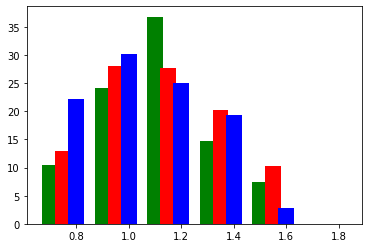

In [30]:
Freq = [10.52631579, 24.21052632, 36.84210526, 14.73684211,  7.36842105, 0.]
Freq2 = [12.90153, 28.11527, 27.66761, 20.21617, 10.34227, 0.]
Freq3 = [22.22489, 30.15078, 25.10463, 19.30926, 2.810434, 0.]
barWidth = 0.25

br1 = range(len(Freq))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]

xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)

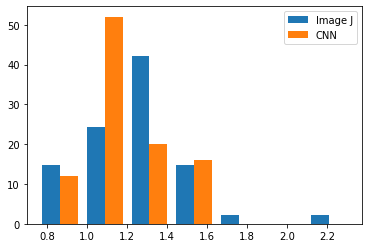

In [31]:
wt1 = np.ones(len(Diam1)) / len(Diam1)*100
wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
X = pd.DataFrame([Diam1,Diameter_All])
wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts,bins=7)
plt.legend(['Image J','CNN'])

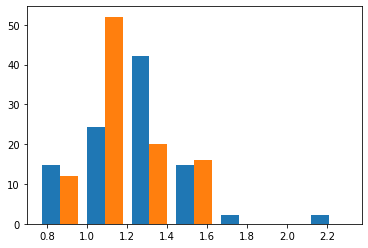

In [32]:
A = plt.hist(X,weights=wts,bins=7)

In [33]:
B = A[0][0]

In [34]:
Novo = []
k = 0
soma = 0
for i in B:
  if(k<4):
    Novo.append(i)
  else:
    soma = soma + i
  k = k + 1
Novo.append(soma)
print(Novo)

[14.736842105263156, 24.2105263157895, 42.1052631578948, 14.736842105263179, 4.21052631578948]


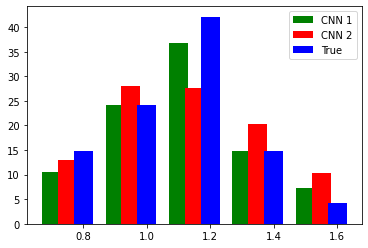

In [35]:
Freq = [10.52631579, 24.21052632, 36.84210526, 14.73684211,  7.36842105]
Freq2 = [12.90153, 28.11527, 27.66761, 20.21617, 10.34227]
Freq3 = Novo
barWidth = 0.25

br1 = range(len(Freq))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]
labels = [0.8, 1.0, 1.2, 1.4, 1.6]

xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)
plt.legend(['CNN 1','CNN 2','True'])